In [3]:
import timeit
import random
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
from typing import List

In [4]:
def generate_list(n: int) -> List:
    return [random.randint(0, n) for _ in range(n)]

In [5]:
def oddEvenSort(array: List) -> List:
    arr_len = len(array)

    for i in range(arr_len):
        start_point = 0 if i % 2 == 0 else 1
        for j in range(start_point, arr_len - 1, 2):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
    
    return array

In [6]:
def speed_tester() -> List:
    speed = []
    for i in range(1_000, 11_000, 1_000):
        arr = generate_list(i)
        speed.append(timeit.Timer(lambda: oddEvenSort(arr)).repeat(10, 1))
        print(f"{len(arr)} - done")
    
    return speed

In [7]:
speed = speed_tester()
speed

1000 - done
2000 - done
3000 - done
4000 - done
5000 - done
6000 - done
7000 - done
8000 - done
9000 - done
10000 - done


[[0.05981160000374075,
  0.041913000008207746,
  0.04104450000158977,
  0.04062149999663234,
  0.04122710000956431,
  0.039857499999925494,
  0.03948780000791885,
  0.0369978000089759,
  0.03376980000757612,
  0.034133599998313],
 [0.2521511999948416,
  0.1357962000038242,
  0.13551159999042284,
  0.13693560000683647,
  0.13949470000807196,
  0.1446838999981992,
  0.1546692000119947,
  0.1386379999894416,
  0.14285790000576526,
  0.14747599999827798],
 [0.6134664999990491,
  0.3336600000038743,
  0.30987240000104066,
  0.306951200007461,
  0.31014289999438915,
  0.30902590000187047,
  0.30618179999873973,
  0.31640239999978803,
  0.3123230000055628,
  0.3070101000048453],
 [1.0132354000088526,
  0.5493312000035075,
  0.5475096000009216,
  0.5484826000028988,
  0.5541214999975637,
  0.5480944000009913,
  0.5852148000121815,
  0.5711762999999337,
  0.6900835999986157,
  0.6931635999935679],
 [1.5828371000097832,
  0.8529875999956857,
  0.8543582999991486,
  0.8529414999939036,
  0.855889

In [8]:
np_arr = numpy.array(speed)
np_arr

array([[0.0598116, 0.041913 , 0.0410445, 0.0406215, 0.0412271, 0.0398575,
        0.0394878, 0.0369978, 0.0337698, 0.0341336],
       [0.2521512, 0.1357962, 0.1355116, 0.1369356, 0.1394947, 0.1446839,
        0.1546692, 0.138638 , 0.1428579, 0.147476 ],
       [0.6134665, 0.33366  , 0.3098724, 0.3069512, 0.3101429, 0.3090259,
        0.3061818, 0.3164024, 0.312323 , 0.3070101],
       [1.0132354, 0.5493312, 0.5475096, 0.5484826, 0.5541215, 0.5480944,
        0.5852148, 0.5711763, 0.6900836, 0.6931636],
       [1.5828371, 0.8529876, 0.8543583, 0.8529415, 0.8558895, 0.868466 ,
        0.8597971, 0.8611755, 0.8624051, 0.856559 ],
       [2.3158034, 1.2330183, 1.2438367, 1.2368183, 1.2301306, 1.2267822,
        1.2343888, 1.2367822, 1.2285354, 1.246152 ],
       [3.1552659, 1.9778656, 2.0005477, 2.0111088, 1.8877603, 1.8926774,
        1.6944193, 1.7093334, 1.7107906, 1.6652986],
       [4.0696721, 2.1924835, 2.1921178, 2.2014749, 2.2299433, 2.1939379,
        2.1990911, 2.1862388, 2.21184

In [9]:
np_average = numpy.mean(np_arr, axis=1)
np_average

array([0.04088642, 0.15282143, 0.34250362, 0.6300413 , 0.93074167,
       1.34322479, 1.97050676, 2.38648878, 3.01554114, 3.71066983])

In [10]:
np_std = numpy.std(np_arr, axis=1)
np_std

array([0.00688339, 0.03359241, 0.09064604, 0.13869328, 0.21741391,
       0.32424624, 0.41523536, 0.56119689, 0.71892307, 0.88361849])

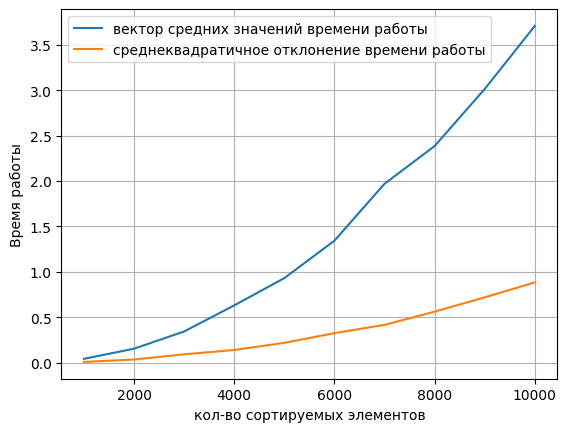

In [11]:
ax = plt.subplot()

x_line = range(1_000, 11_000, 1_000)

ax.plot(x_line, np_average, label="вектор средних значений времени работы")
ax.plot(x_line, np_std, label="среднеквадратичное отклонение времени работы")

ax.set_xlabel("кол-во сортируемых элементов")
ax.set_ylabel("Время работы")
ax.legend()
ax.grid()